In [30]:
import itertools

In [31]:
with open("instructions.txt") as file:
    instructions = file.read()

In [32]:
instructions_list = ["".join(x) for _, x in itertools.groupby(instructions, key=str.isdigit)]
instructions_list = [int(instruction) if instruction.isdigit() else instruction for instruction in instructions_list]

In [33]:
with open("maze.txt") as file:
    maze = file.read().split("\n")

In [34]:
maze = [maze_row.ljust(len(maze[0]),' ') for maze_row in maze]

In [35]:
startindex = [0, maze[0].index('.')]

In [36]:
lookup = {
    "R": {"R": "D", "L": "U"},
    "L": {"R": "U", "L": "D"},
    "U": {"R": "R", "L": "L"},
    "D": {"R": "L", "L": "R"},
}
score = {"R": 0, "L": 2, "U": 3, "D": 1}


In [37]:
import numpy as np
from typing import List

In [38]:
def check_direction(new_index: List[int]) -> int:
    if 0<=new_index[0]<max_vertical_size and 0<=new_index[1]<max_horizontal_size:
        if maze[new_index[0]][new_index[1]] =="#":
            return 0
        elif maze[new_index[0]][new_index[1]] ==".":
            return 1
    return 2

# Part 1

In [10]:
max_vertical_size = len(maze)
max_horizontal_size = len(maze[0])
full_grid = np.zeros((max_vertical_size, max_horizontal_size))
direction = "R"
index = startindex.copy()
for instruction in instructions_list:
    if isinstance(instruction, int):
        for i in range(instruction):
            if direction == "R":
                new_index = [index[0], index[1] + 1]
                checked = check_direction(new_index)
                if checked == 0:
                    break
                elif checked == 1:
                    index = new_index
                elif checked == 2:
                    # Fix horizontal looping
                    if (
                        maze[index[0]][
                            min(
                                maze[index[0]].find(".")
                                if maze[index[0]].find(".") != -1
                                else 9999999,
                                maze[index[0]].find("#")
                                if maze[index[0]].find("#") != -1
                                else 9999999,
                            )
                        ]
                        == "#"
                    ):
                        break
                    else:
                        index = [index[0], maze[index[0]].find(".")]
            if direction == "L":
                new_index = [index[0], index[1] - 1]
                checked = check_direction(new_index)
                if checked == 0:
                    break
                elif checked == 1:
                    index = new_index
                elif checked == 2:
                    try_index = (
                        len(maze[index[0]])
                        - min(
                            maze[index[0]][::-1].find(".")
                            if maze[index[0]][::-1].find(".") != -1
                            else 9999999,
                            maze[index[0]][::-1].find("#")
                            if maze[index[0]][::-1].find("#") != -1
                            else 9999999,
                        )
                        - 1
                    )
                    if maze[index[0]][try_index] == "#":
                        break
                    else:
                        index = [index[0], try_index]
            if direction == "D":
                new_index = [index[0] + 1, index[1]]
                checked = check_direction(new_index)
                if checked == 0:
                    break
                elif checked == 1:
                    index = new_index
                elif checked == 2:
                    vertical_segment = "".join(
                        [maze[i][index[1]] for i in range(max_vertical_size)]
                    )
                    try_index = min(
                        vertical_segment.find(".")
                        if vertical_segment.find(".") != -1
                        else 9999999,
                        vertical_segment.find("#")
                        if vertical_segment.find("#") != -1
                        else 9999999,
                    )
                    if maze[try_index][index[1]] == "#":
                        break
                    else:
                        index = [try_index, index[1]]

            if direction == "U":
                if maze[index[0] - 1][index[1]] == ".":
                    index = [index[0] - 1, index[1]]
                elif maze[index[0] - 1][index[1]] == "#":
                    break
                else:
                    vertical_segment = "".join(
                        [maze[i][index[1]] for i in range(max_vertical_size)]
                    )
                    try_index = (
                        max_vertical_size
                        - min(
                            vertical_segment[::-1].find(".")
                            if vertical_segment[::-1].find(".") != -1
                            else 9999999,
                            vertical_segment[::-1].find("#")
                            if vertical_segment[::-1].find("#") != -1
                            else 9999999,
                        )
                        - 1
                    )
                    if maze[try_index][index[1]] == "#":
                        break
                    else:
                        index = [try_index, index[1]]

            full_grid[(index[0], index[1])] = ord(direction)
    else:
        direction = lookup[direction][instruction]
(index[0]+1)*1000+(index[1]+1)*4+score[direction]
# Should be larger then 161182

162186

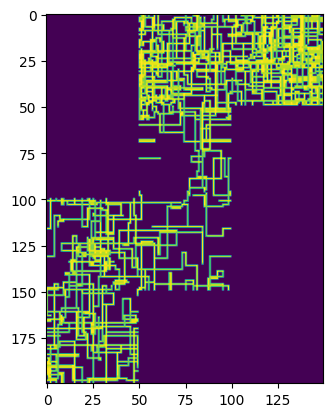

In [11]:
from matplotlib import pyplot as plt
plt.imshow(full_grid)

# Part 2

In [12]:
import math

In [23]:
nr = 1
cube_nrs = maze.copy()
for i in range(0, max_vertical_size, 50):
    min_loc = maze[i].find(".")
    max_loc = max_horizontal_size - maze[i][::-1].find(".")
    for k in range(math.ceil((max_loc-min_loc)/50)):
        for j in range(i,i+50):
            cube_nrs[j] = cube_nrs[j][0:min_loc+k*50]+str(nr)*50+cube_nrs[j][min_loc+(k+1)*50:]
        nr+=1

In [24]:
walk_matrix = {
    "1": {"U": ["6", "R"], "D": ["3", "D"], "R": ["2", "R"], "L": ["4", "R"]},
    "2": {"U": ["6", "U"], "D": ["3", "L"], "R": ["5", "L"], "L": ["1", "L"]},
    "3": {"U": ["1", "U"], "D": ["5", "D"], "R": ["2", "U"], "L": ["4", "D"]},
    "4": {"U": ["3", "R"], "D": ["6", "D"], "R": ["5", "R"], "L": ["1", "R"]},
    "5": {"U": ["3", "U"], "D": ["6", "L"], "R": ["2", "L"], "L": ["4", "L"]},
    "6": {"U": ["4", "U"], "D": ["2", "D"], "R": ["5", "U"], "L": ["1", "D"]},
}
indices_walkaround = {
    "1": {"4": [[[100, 0], [149, 0]], True], "6": [[[150, 0], [199, 0]], False]},
    "2": {
        "3": [[[50, 99], [99, 99]], False],
        "5": [[[100, 99], [149, 99]], True],
        "6": [[[199, 0], [199, 49]], False],
    },
    "3": {"2": [[[50, 100], [50, 149]], False], "4": [[[100, 0], [100, 49]], False]},
    "4": {"1": [[[0, 50], [49, 50]], True], "3": [[[50, 50], [99, 50]], False]},
    "5": {"2": [[[0, 149], [49, 149]], True], "6": [[[150, 49], [199, 49]], False]},
    "6": {
        "1": [[[0, 50], [0, 99]], False],
        "2": [[[0, 100], [0, 149]], False],
        "5": [[[149, 50], [149, 99]], False],
    },
}


In [25]:
def walk_around_edge(current_pos, direction):
    side = cube_nrs[current_pos[0]][current_pos[1]]
    new_side, new_direction = walk_matrix[side][direction]
    range_new_side, reverse = indices_walkaround[side][new_side]

    if direction in ["L","R"]:
        position_on_axis = current_pos[0] % 50
    else:
        position_on_axis = current_pos[1] % 50

    if range_new_side[0][1] == range_new_side[1][1]:
        if reverse:
            new_position = [range_new_side[1][0] - position_on_axis, range_new_side[0][1]]
        else:
            new_position = [range_new_side[0][0] + position_on_axis, range_new_side[0][1]]
    
    if range_new_side[0][0] == range_new_side[1][0]:
        if reverse:
            new_position = [range_new_side[0][0], range_new_side[1][1] - position_on_axis]
        else:
            new_position = [range_new_side[0][0], range_new_side[0][1] + position_on_axis]

    return new_position, new_direction


In [16]:
maze[150][7]

'.'

In [17]:
instructions_list[:11]

[36, 'R', 27, 'L', 7, 'R', 50, 'R', 50, 'L', 10]

In [29]:
max_vertical_size = len(maze)
max_horizontal_size = len(maze[0])
full_grid = np.zeros((max_vertical_size, max_horizontal_size))
direction = "R"
index = [0, maze[0].index('.')]
for nr, instruction in enumerate(instructions_list):
    if isinstance(instruction, int):

        for i in range(instruction):
            if direction == "R":
                new_index = [index[0], index[1] + 1]
                checked = check_direction(new_index)
                if checked == 0:
                    break
                elif checked == 1:
                    index = new_index
                elif checked == 2:
                    try_index, new_direction = walk_around_edge(index, direction)
                    if maze[try_index[0]][try_index[1]] == "#":
                        break
                    else:
                        index = try_index
                        direction = new_direction

            if direction == "L":
                new_index = [index[0], index[1] - 1]
                checked = check_direction(new_index)
                if checked == 0:
                    break
                elif checked == 1:
                    index = new_index
                elif checked == 2:
                    try_index, new_direction = walk_around_edge(index, direction)
                    if maze[try_index[0]][try_index[1]] == "#":
                        break
                    else:
                        index = try_index
                        direction = new_direction

            if direction == "D":
                new_index = [index[0] + 1, index[1]]
                checked = check_direction(new_index)
                if checked == 0:
                    break
                elif checked == 1:
                    index = new_index
                elif checked == 2:
                    try_index, new_direction = walk_around_edge(index, direction)
                    if maze[try_index[0]][try_index[1]] == "#":
                        break
                    else:
                        index = try_index
                        direction = new_direction

            if direction == "U":
                new_index = [index[0] - 1, index[1]]
                checked = check_direction(new_index)
                if checked == 0:
                    break
                elif checked == 1:
                    index = new_index
                elif checked == 2:
                    try_index, new_direction = walk_around_edge(index, direction)
                    if maze[try_index[0]][try_index[1]] == "#":
                        break
                    else:
                        index = try_index
                        direction = new_direction

            full_grid[(index[0], index[1])] = ord(direction)
    else:
        direction = lookup[direction][instruction]
(index[0] + 1) * 1000 + (index[1] + 1) * 4 + score[direction]

# Needs to > 1451 > 21_316  <144_029


4365

In [20]:
200 * 1000 +  15 * 4 + score["D"]

200061

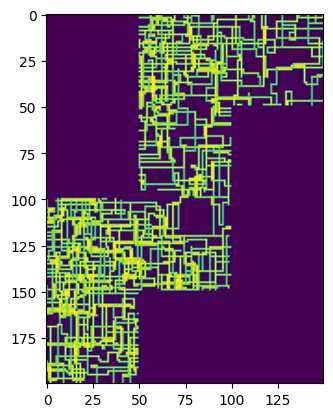

In [28]:
from matplotlib import pyplot as plt
plt.imshow(full_grid)

In [ ]:
instructions_list

In [ ]:
maze

In [77]:
moves_from_direction = {
    "U": (-1, 0),
    "D": (1, 0),
    "R": (0, 1),
    "L": (0, -1),
}

score = {"R": 0, "L": 2, "U": 3, "D": 1}


In [180]:
turns = {
    "U": {"R": "R", "L":"L"},
    "D": {"R": "L", "L":"R"},
    "R": {"R": "D", "L":"U"},
    "L": {"R": "U", "L":"D"},
}

In [193]:
lookup_next_side = {
    "1": {
        "U": ("6", [(150, 0), (199, 0)], False, "R"),
        "L": ("4", [(100, 0), (149, 0)], True, "R"),
    },
    "2": {
        "U": ("6", [(199, 0), (199, 49)], False, "U"),
        "R": ("5", [(100, 99), (149, 99)], True, "L"),
        "D": ("3", [(50, 99), (99, 99)], False, "L"),
    },
    "3": {
        "R": ("2", [(49, 100), (49, 149)], False, "U"),
        "L": ("4", [(100, 0), (100, 49)], False, "D"),
    },
    "4": {
        "U": ("3", [(50, 50), (99, 50)], False, "R"),
        "L": ("1", [(0, 50), (49, 50)], True, "R"),
    },
    "5": {
        "R": ("2", [(0, 149), (49, 149)], True, "L"),
        "D": ("6", [(150, 49), (199, 49)], False, "L"),
    },
    "6": {
        "L": ("1", [(0, 50), (0, 99)], False, "D"),
        "R": ("5", [(149, 50), (149, 99)], False, "U"),
        "D": ("2", [(0, 100), (0, 149)], False, "D"),
    },
}


In [194]:
def can_move(new_position):
    global maze
    if maze[new_position[0]][new_position[1]] == "#":
        return False
    elif maze[new_position[0]][new_position[1]] == ".":
        return True
    else:
        print("Not defined")

In [195]:
def move_over_boundary(current_side, direction, boundary_position):
    global lookup_next_side
    new_side, new_range, reverse, new_direction = lookup_next_side[current_side][
        direction
    ]
    if direction in ["R", "L"]:
        position_on_side = boundary_position[0] % 50
    else:
        position_on_side = boundary_position[1] % 50

    if new_range[0][0] == new_range[1][0]:
        if reverse:
            new_position = (new_range[1][0], new_range[1][1] - position_on_side)
        else:
            new_position = (new_range[0][0], new_range[0][1] + position_on_side)
    if new_range[0][1] == new_range[1][1]:
        if reverse:
            new_position = (new_range[1][0] - position_on_side, new_range[1][1])
        else:
            new_position = (new_range[0][0] + position_on_side, new_range[0][1])
    return new_position, new_direction

In [196]:
def get_new_position(current_position, direction):
    global maze, cube_nrs, moves_from_direction
    move_i, move_j = moves_from_direction[direction]
    new_position = current_position[0] + move_i, current_position[1] + move_j

    if new_position[0] < 0 or new_position[0] > len(maze) - 1:
        new_position, new_direction = move_over_boundary(
            cube_nrs[current_position[0]][current_position[1]],
            direction,
            current_position,
        )
    elif new_position[1] < 0 or new_position[1] > len(maze[0]) - 1:
        new_position, new_direction = move_over_boundary(
            cube_nrs[current_position[0]][current_position[1]],
            direction,
            current_position,
        )
    elif maze[new_position[0]][new_position[1]] == " ":
        new_position, new_direction = move_over_boundary(
            cube_nrs[current_position[0]][current_position[1]],
            direction,
            current_position,
        )
    else:
        new_direction = direction
    return new_position, new_direction


In [200]:
direction = "R"
current_position = tuple(startindex)
for instruction in instructions_list:
    if isinstance(instruction, int):
        for _ in range(instruction):
            new_position, new_direction = get_new_position(current_position, direction)
            if can_move(new_position):
                current_position = new_position
                direction = new_direction
            else:
                break
    else:
        direction = turns[direction][instruction]
1000 * (current_position[0]+1) + 4 * (current_position[1]+1) + score[direction]

55267